# 회귀분석

## 1) 데이터 셋 준비

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

c:\users\samsung\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
data_path = 'data/'
train = pd.read_csv(data_path + 'train.csv')
test = pd.read_csv(data_path + 'test.csv')

In [3]:
Ptrain = train[['id','date','price','bedrooms','bathrooms','sqft_living', 'floors', 'grade', 'yr_built','view',]]
Ptrain

,id,date,price,bedrooms,bathrooms,sqft_living,floors,grade,yr_built,view
0,0,20141013T000000,221900.0,3,1.00,1180,1.0,7,1955,0
1,1,20150225T000000,180000.0,2,1.00,770,1.0,6,1933,0
2,2,20150218T000000,510000.0,3,2.00,1680,1.0,8,1987,0
3,3,20140627T000000,257500.0,3,2.25,1715,2.0,7,1995,0
4,4,20150115T000000,291850.0,3,1.50,1060,1.0,7,1963,0
...,...,...,...,...,...,...,...,...,...,...
15030,15030,20141014T000000,610685.0,4,2.50,2520,2.0,9,2014,0
15031,15031,20150326T000000,1007500.0,4,3.50,3510,2.0,9,2009,0
15032,15032,20140521T000000,360000.0,3,2.50,1530,3.0,8,2009,0
15033,15033,20150223T000000,400000.0,4,2.50,2310,2.0,8,2014,0


## 2) 결측치 및 변수간 상관관계 확인

In [4]:
Ptrain.describe()

,id,price,bedrooms,bathrooms,sqft_living,floors,grade,yr_built,view
count,15035.000000,1.503500e+04,15035.000000,15035.000000,15035.000000,15035.000000,15035.000000,15035.000000,15035.000000
mean,7517.000000,5.406827e+05,3.369139,2.115065,2083.790223,1.498071,7.660725,1971.100432,0.234253
std,4340.374984,3.715247e+05,0.902721,0.767519,922.134087,0.538522,1.179803,29.407612,0.763376
min,0.000000,7.800000e+04,0.000000,0.000000,290.000000,1.000000,1.000000,1900.000000,0.000000
25%,3758.500000,3.220000e+05,3.000000,1.750000,1430.000000,1.000000,7.000000,1951.000000,0.000000
50%,7517.000000,4.500000e+05,3.000000,2.250000,1910.000000,1.500000,7.000000,1975.000000,0.000000
75%,11275.500000,6.450000e+05,4.000000,2.500000,2560.000000,2.000000,8.000000,1997.000000,0.000000
max,15034.000000,7.700000e+06,10.000000,8.000000,13540.000000,3.500000,13.000000,2015.000000,4.000000


In [5]:
# 명목변수 확인 -> date: 연도월일 6자리만 사용, 명목변수와 price간 관계 확인 필요
print(list(train.columns))
 
nan_cols = [i for i in train.columns if train[i].isnull().any()]
nan_cols

['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long', 'sqft_living15', 'sqft_lot15']


[]

### 2-1) 변수 간 상관관계 확인

In [6]:
train['date'] = train['date'].apply(lambda x: x[2:8])
train['yr_built'] = train['yr_built'].apply(lambda x: x%100)

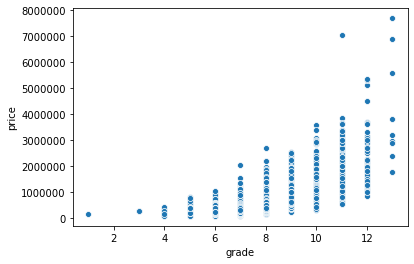

In [7]:
sns.scatterplot(x = train['grade'], y= train['price'], data = train)

In [8]:
Ptrain.corr()
# 가격과 연관이 높은 변수: sqft_living, grade, sqft_above, sqft_living15
# 서로 상관관계가 유의미한 변수: bathrooms-sqft_living, sqft_living-grade
# -> bathrooms, grade 변수 제거

,id,price,bedrooms,bathrooms,sqft_living,floors,grade,yr_built,view
id,1.000000,0.020899,0.010520,0.104030,0.041725,0.182848,0.078622,0.202477,-0.024360
price,0.020899,1.000000,0.323672,0.525479,0.702899,0.262588,0.667211,0.047290,0.400806
bedrooms,0.010520,0.323672,1.000000,0.530548,0.596974,0.189532,0.375286,0.158799,0.085703
bathrooms,0.104030,0.525479,0.530548,1.000000,0.755853,0.508649,0.666278,0.503964,0.187488
sqft_living,0.041725,0.702899,0.596974,0.755853,1.000000,0.363193,0.762543,0.315927,0.282821
floors,0.182848,0.262588,0.189532,0.508649,0.363193,1.000000,0.462598,0.490436,0.034511
grade,0.078622,0.667211,0.375286,0.666278,0.762543,0.462598,1.000000,0.440608,0.247924
yr_built,0.202477,0.047290,0.158799,0.503964,0.315927,0.490436,0.440608,1.000000,-0.061670
view,-0.024360,0.400806,0.085703,0.187488,0.282821,0.034511,0.247924,-0.061670,1.000000


In [9]:
Ptrain = Ptrain.drop(['bathrooms','grade'],axis=1)
Ptrain

,id,date,price,bedrooms,sqft_living,floors,yr_built,view
0,0,20141013T000000,221900.0,3,1180,1.0,1955,0
1,1,20150225T000000,180000.0,2,770,1.0,1933,0
2,2,20150218T000000,510000.0,3,1680,1.0,1987,0
3,3,20140627T000000,257500.0,3,1715,2.0,1995,0
4,4,20150115T000000,291850.0,3,1060,1.0,1963,0
...,...,...,...,...,...,...,...,...
15030,15030,20141014T000000,610685.0,4,2520,2.0,2014,0
15031,15031,20150326T000000,1007500.0,4,3510,2.0,2009,0
15032,15032,20140521T000000,360000.0,3,1530,3.0,2009,0
15033,15033,20150223T000000,400000.0,4,2310,2.0,2014,0


### 2-2) 변수 처리

In [10]:
Ptrain['date'] = Ptrain['date'].apply(lambda x: x[2:8])
Ptrain['yr_built'] = Ptrain['yr_built'].apply(lambda x: x%100)

In [11]:
Ptrain

,id,date,price,bedrooms,sqft_living,floors,yr_built,view
0,0,141013,221900.0,3,1180,1.0,55,0
1,1,150225,180000.0,2,770,1.0,33,0
2,2,150218,510000.0,3,1680,1.0,87,0
3,3,140627,257500.0,3,1715,2.0,95,0
4,4,150115,291850.0,3,1060,1.0,63,0
...,...,...,...,...,...,...,...,...
15030,15030,141014,610685.0,4,2520,2.0,14,0
15031,15031,150326,1007500.0,4,3510,2.0,9,0
15032,15032,140521,360000.0,3,1530,3.0,9,0
15033,15033,150223,400000.0,4,2310,2.0,14,0


## 3. 모델링

In [12]:
import xgboost as xgb
import lightgbm as lgb

from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.metrics import mean_squared_error
from sklearn import preprocessing

In [13]:
# 명목변수 인코딩
lbl = preprocessing.LabelEncoder()
cat_features = ['bedrooms','floors','yr_built','date' , 'view'] 

for i in cat_features :
    Ptrain[i] = lbl.fit_transform(Ptrain[i].astype(str))

In [14]:
target = Ptrain['price']

train_x = Ptrain.iloc[:10000,:].drop(['price'],axis =1)
train_y = target.iloc[:10000]

test_x = Ptrain.iloc[10000:, :].drop(['price'],axis =1)
test_y = target.iloc[10000:]

In [15]:
xgbr = xgb.XGBRegressor(learning_rate=0.05, max_depth=7, 
                             reg_alpha=0.4640, reg_lambda=0.8571,
                             subsample=0.5213,random_state =7, nthread = -1)

lgbr = lgb.LGBMRegressor(objective='regression',
                              learning_rate=0.05,  bagging_seed=9,min_data_in_leaf =5)

In [16]:
n_folds = 10

def rmsle_cv(model):
    kf = KFold(n_folds, shuffle=True, random_state=42).get_n_splits(train.values)
    rmse= np.sqrt(-cross_val_score(model, train_x.values, train_y, scoring="neg_mean_squared_error", cv = kf))
    return(rmse)

In [17]:
score = rmsle_cv(xgbr)
print("Xgboost score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

score = rmsle_cv(lgbr)
print("LGBM score: {:.4f} ({:.4f})\n" .format(score.mean(), score.std()))

Xgboost score: 235650.0707 (18505.2912)

LGBM score: 248194.3568 (25398.4984)



### 4) 예측

In [18]:
def rmsle(y, y_pred):
    return np.sqrt(mean_squared_error(y, y_pred))

In [19]:
#XGBoost
xgbr.fit(train_x, train_y)
xgb_train_pred = xgbr.predict(test_x)
print(rmsle(test_y, xgb_train_pred))

#LightGBM
lgbr.fit(train_x, train_y)
lgb_train_pred = lgbr.predict(test_x)
print(rmsle(test_y, lgb_train_pred))

238418.18387501762
238091.68945155223


In [21]:
final = xgb_train_pred *0.7 + lgb_train_pred * 0.3
final[:10]

array([388366.93854448, 284216.54229607, 574804.48280025, 611481.70773427,
       484599.55608358, 344755.27615816, 376149.02155938, 241253.13746513,
       563640.10455642, 346968.82394531])

In [22]:
test_y[:10]

10000    800500.0
10001    168500.0
10002    490000.0
10003    600000.0
10004    445000.0
10005    362500.0
10006    234000.0
10007    321500.0
10008    660000.0
10009    314000.0
Name: price, dtype: float64

In [23]:
print(rmsle(test_y, final))

235417.7122571012
